# Introduction
* This notebook contains image classification of dogs, where the classes are "Jiny" and "Not Jiny".
* This is Jiny, she is my perfect dog:

<img src="jiny.2.jpeg">

* For this project, I used transfer learning from a pre-trained MobileNet network.
* This way, I was able to make a classifier with an accuracy of 99.23%, using not much computational power (only my home laptop) and a very small training set (70 images of Jiny and 200 images of other dogs).
* The images of Jiny are from my phone, and the images of the other dogs are from the "Dogs & Cats Images" dataset from kaggle: https://www.kaggle.com/chetankv/dogs-cats-images

#### The notebook is devided into several parts:
* Import
* Get the data
* Build the model
* Fit the model
* Evaluate the model using a test dataset

# Import

In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import load_img

# Get the data

In [2]:
# Training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('train_data/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

n_classes = len(train_generator.class_indices.keys())

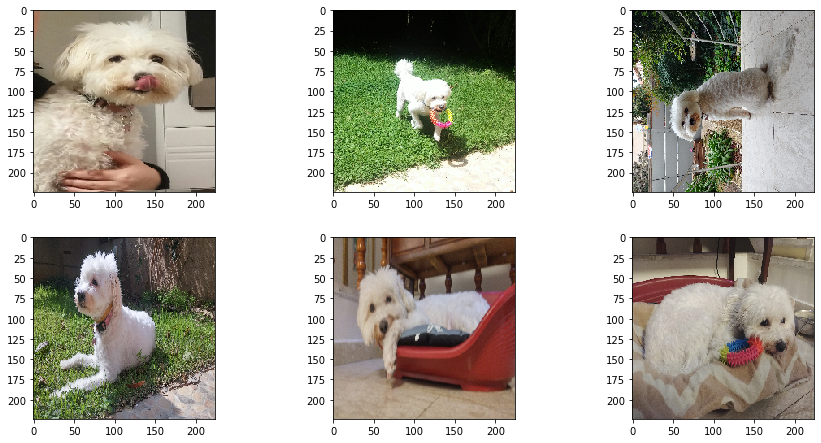

In [3]:
# Examples of images from class "Jiny":
for i in range(6):
    img_i = load_img(f'train_data/Jiny/jiny.{i+1}.jpg', target_size=(224, 224))
    plt.subplot(2,3,i+1)
    plt.imshow(img_i)
    
plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=2, hspace=0.25, wspace=0.35)
plt.show()

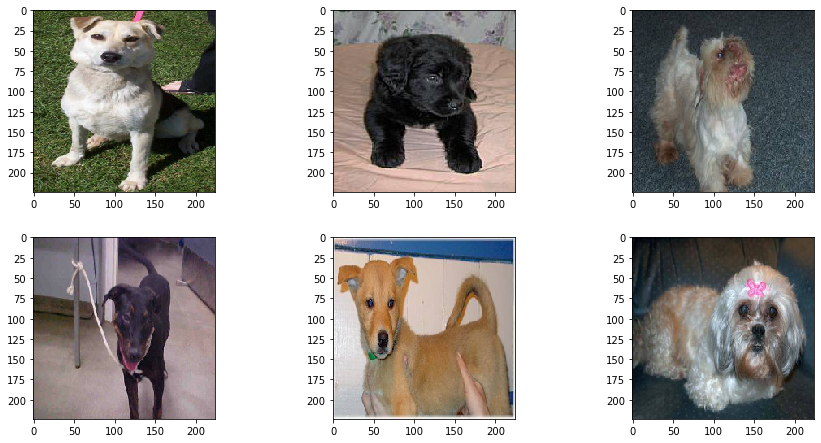

In [4]:
# Examples of images from class "Not Jiny":
for i in range(6):
    img_i = load_img(f'train_data/Not Jiny/dog.{i+90}.jpg', target_size=(224, 224))
    plt.subplot(2,3,i+1)
    plt.imshow(img_i)
    
plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=2, hspace=0.25, wspace=0.35)
plt.show()

In [5]:
# Test data
test_generator = train_datagen.flow_from_directory('test_data/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

# Build the model

In [6]:
# imports the MobileNet model and discards the last 1000 neuron layer.
base_model=MobileNet(weights='imagenet',include_top=False) 

# Adds dense layers so that the model can learn more complex functions.
# The final layer is a softmax activation.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024, activation='relu')(x) 
x=Dense(1024, activation='relu')(x) 
x=Dense(512, activation='relu')(x) 
preds=Dense(n_classes, activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=preds)

# Set the first 20 layers of the network to be non-trainable, so the pre-trained weights will be used.
# The last 4 layers are the only layers that will be trained.
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True
    
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
print(model.summary())


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128

# Fit the model

In [8]:
step_size_train = train_generator.n//train_generator.batch_size

model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=15)


Epoch 1/10
8/8 [==============================] - 85s 11s/step - loss: 0.4149 - acc: 0.8262
Epoch 2/10
8/8 [==============================] - 75s 9s/step - loss: 0.0633 - acc: 0.9764
Epoch 3/10
8/8 [==============================] - 89s 11s/step - loss: 0.1042 - acc: 0.9567
Epoch 4/10
8/8 [==============================] - 75s 9s/step - loss: 0.4844 - acc: 0.9359
Epoch 5/10
8/8 [==============================] - 77s 10s/step - loss: 0.1310 - acc: 0.9685
Epoch 6/10
8/8 [==============================] - 86s 11s/step - loss: 0.1067 - acc: 0.9766
Epoch 7/10
8/8 [==============================] - 85s 11s/step - loss: 0.1468 - acc: 0.9596
Epoch 8/10
8/8 [==============================] - 85s 11s/step - loss: 0.0458 - acc: 0.9758
Epoch 9/10
8/8 [==============================] - 72s 9s/step - loss: 0.0049 - acc: 0.9961
Epoch 10/10
8/8 [==============================] - 56s 7s/step - loss: 0.0016 - acc: 1.0000



# Evaluate the model using a test datadset

In [9]:
loss , acc = model.evaluate(x=test_generator)
print(f"Test accuracy: {round(acc*100,2)}%, Test loss: {round(loss,5)}")


5/5 [==============================] - 15s 3s/step
Test accuracy: 99.23%, Test loss: 0.03037

